In [17]:
# This notebook makes the "flatdata", "flaterr" and "flatcoords" files for a specified filter

import sys
import os
new_python_path = "/n/home02/nephremidze/cab_survey/abell-s1063/delaunay/CAB_with_Delaunay/"
sys.path.append(new_python_path)

import numpy as np

import func_utils as fu
import modeling_utils as mu
import modeling_utils_triangle as mu_trig

# Importing Cagan's analysis data for f200w to double-check that our results match
file_path = '/n/home02/nephremidze/cab_survey/abell-s1063/delaunay/CAB_with_Delaunay/'
# We want to make the following files for f115w and f150w
flatdata = np.load(file_path+'analysis_data/s1063_f200w_flat.npy')
flaterr =  np.load(file_path+'analysis_data/s1063_f200w_err.npy')
flatcoords = np.load(file_path+'analysis_data/s1063_f200w_coords.npy')
scord_filter = np.load(file_path+'analysis_data/s1063_f200w_scord.npy')

# This is just the simulated PSF
psfarray_load = np.load(file_path+'analysis_data/jwst_psf_200_sim.npy')
# This is just the first likemask
likemask = np.load(file_path+'analysis_data/s1063_f200w_likemask.npy')

deltaPix = 0.031230659851709842
cnk = 1 

In [24]:
# Reproduce f200w

filt = '150'

def glue_arrays(ar1, ar2, ar3):
    
    arrglued = np.zeros([np.shape(ar1)[0],int(3*np.shape(ar1)[0])])

    arrglued[:,:np.shape(ar1)[0]] = ar1
    arrglued[:,np.shape(ar1)[0]:int(2*np.shape(ar1)[0])] = ar2
    arrglued[:,int(2*np.shape(ar1)[0]):int(3*np.shape(ar1)[0])] = ar3
    
    return arrglued

def import_imgs_errs(filt):

    file_path = f"/n/home02/nephremidze/cab_survey/abell-s1063/extract_data/f{filt}w/"

    array200sci = np.load(file_path+f'f{filt}w_image1_.npy')
    array200err = np.load(file_path+f'f{filt}w_error1_.npy')

    array200sci2 = np.load(file_path+f'f{filt}w_image2_.npy')
    array200err2 = np.load(file_path+f'f{filt}w_error2_.npy')

    array200sci3 = np.load(file_path+f'f{filt}w_image3_.npy')
    array200err3 = np.load(file_path+f'f{filt}w_error3_.npy')

    imgarr = np.array([array200sci3,array200sci2,array200sci])
    errarr = np.array([array200err3,array200err2,array200err])
    
    imgarr_glued = glue_arrays(array200sci, array200sci2, array200sci3)
    errarr_glued = glue_arrays(array200err, array200err2, array200err3)
    
    likemask = fu.makemask(array200sci,30./cnk,70./cnk,0.8)
    likemask2 = fu.makemask(array200sci2,30/cnk,70./cnk,1.7)
    likemask3 = fu.makemask(array200sci3,30./cnk,70./cnk,0.5)

    likemasks_glued = glue_arrays(likemask, likemask2, likemask3)
    
    return imgarr_glued, errarr_glued, likemasks_glued

images_glued, noises_glued, likemasks_glued = import_imgs_errs(filt)

flatdata_test = fu.flatten_data(images_glued, deltaPix, likemasks_glued)[0]
flaterr_test = fu.flatten_data(noises_glued, deltaPix, likemasks_glued)[0]
flatcoords_test = fu.flatten_data(images_glued, deltaPix, likemasks_glued)[1]

In [25]:
# Double-check that results match with Cagan's

print(flatdata_test - flatdata)
print(flaterr_test - flaterr)
print(flatcoords_test-flatcoords)

[-0.08146301 -0.06255973  0.02302454 ...  0.0070877  -0.0352699
  0.01336207]
[0.01006214 0.01018149 0.01331911 ... 0.01117232 0.01200156 0.01231775]
[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [32]:
# Making files for other filters

filt = '200'

def glue_arrays(ar1, ar2, ar3):
    
    arrglued = np.zeros([np.shape(ar1)[0],int(3*np.shape(ar1)[0])])

    arrglued[:,:np.shape(ar1)[0]] = ar1
    arrglued[:,np.shape(ar1)[0]:int(2*np.shape(ar1)[0])] = ar2
    arrglued[:,int(2*np.shape(ar1)[0]):int(3*np.shape(ar1)[0])] = ar3
    
    return arrglued

def import_imgs_errs(filt):

    file_path = f"/n/home02/nephremidze/cab_survey/abell-s1063/extract_data/f{filt}w/"

    array200sci = np.load(file_path+f'f{filt}w_image1_.npy')
    array200err = np.load(file_path+f'f{filt}w_error1_.npy')

    array200sci2 = np.load(file_path+f'f{filt}w_image2_.npy')
    array200err2 = np.load(file_path+f'f{filt}w_error2_.npy')

    array200sci3 = np.load(file_path+f'f{filt}w_image3_.npy')
    array200err3 = np.load(file_path+f'f{filt}w_error3_.npy')

    imgarr = np.array([array200sci3,array200sci2,array200sci])
    errarr = np.array([array200err3,array200err2,array200err])
    
    imgarr_glued = glue_arrays(array200sci, array200sci2, array200sci3)
    errarr_glued = glue_arrays(array200err, array200err2, array200err3)
    
    likemask = fu.makemask(array200sci,30./cnk,70./cnk,0.8)
    likemask2 = fu.makemask(array200sci2,30/cnk,70./cnk,1.7)
    likemask3 = fu.makemask(array200sci3,30./cnk,70./cnk,0.5)

    likemasks_glued = glue_arrays(likemask, likemask2, likemask3)
    
    return imgarr_glued, errarr_glued, likemasks_glued

images_glued, noises_glued, likemasks_glued = import_imgs_errs(filt)

flatdata_test = fu.flatten_data(images_glued, deltaPix, likemasks_glued)[0]
flaterr_test = fu.flatten_data(noises_glued, deltaPix, likemasks_glued)[0]
flatcoords_test = fu.flatten_data(images_glued, deltaPix, likemasks_glued)[1]

In [33]:
save_path = '/n/home02/nephremidze/cab_survey/abell-s1063/delaunay/CAB_with_Delaunay/analysis_data/'
full_save_path = save_path + f'original_masks/f{filt}w/'

os.makedirs(full_save_path, exist_ok=True)

np.save(full_save_path + f's1063_f{filt}w_flat.npy', flatdata_test)
np.save(full_save_path + f's1063_f{filt}w_err.npy', flaterr_test)
np.save(full_save_path + f's1063_f{filt}w_coords.npy', flatcoords_test)


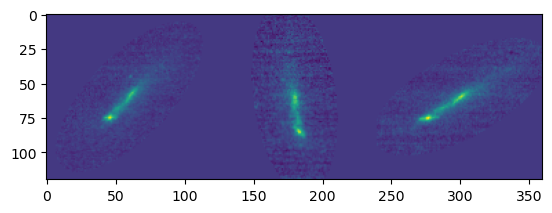

In [28]:
unflatdata = fu.unflatten_data(flatdata_test,likemasks_glued)
unflaterr = fu.unflatten_data(flaterr_test,likemasks_glued)

import matplotlib.pyplot as plt
plt.imshow(unflatdata)
#plt.imshow(unflaterr)

In [14]:
flatcoords

array([[-0.64022853, -1.85822426],
       [-0.60899787, -1.85822426],
       [-0.57776721, -1.85822426],
       ...,
       [ 0.64022853,  1.85822426],
       [ 0.67145919,  1.85822426],
       [ 0.70268985,  1.85822426]])